Using Predictive Analytics to Assess Heart Disease Risk


Context:

Rudecia Bernard

In [114]:
import pandas as pd
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from kmodes.kmodes import KModes
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, precision_score
import numpy as np



heart = pd.read_csv('/Users/rudeciabernard/Downloads/heart.csv')
heart.isnull().sum() #Clean data. Yay!

heart = heart.rename({'target': 'heart_disease',
                      'thalach' : 'max_hr',
                      'exang': 'angina',
                      'oldpeak': 'st_depression',
                      'slope': 'st_slope',
                      'fbs': 'hyperglycemic',
                      'cp': 'angina_type',
                      'trestbps': 'resting_bp'}, axis = 1)


heart['angina_type'] = heart['angina_type'].replace({0: 1, 1:2, 2:3, 3:4})
heart['st_slope'] = heart['st_slope'].replace({0: 1, 1:2, 2:3})


 Exploratory Analyses:

 First, identify strongly correlated variables visually with a correlation heatmap:

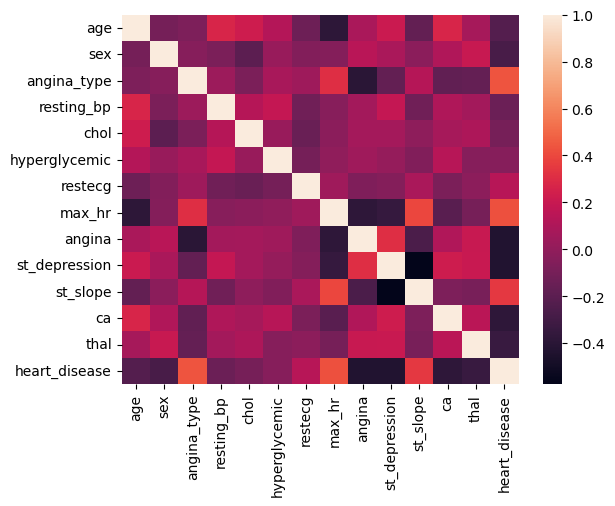

In [115]:
sns.heatmap(heart.corr())
plt.show()

Heart disease appears to be most strongly correlated with st slope, max hr achieved during patients' stress tests, and the type of angina they exhibit. 
Let's look at these variables more closely: 

In [116]:
print(heart[['st_slope', 'heart_disease']].corr())
print(heart[['max_hr', 'heart_disease']].corr())
print(heart[['angina_type', 'heart_disease']].corr())


               st_slope  heart_disease
st_slope       1.000000       0.345512
heart_disease  0.345512       1.000000
                 max_hr  heart_disease
max_hr         1.000000       0.422895
heart_disease  0.422895       1.000000
               angina_type  heart_disease
angina_type       1.000000       0.434854
heart_disease     0.434854       1.000000


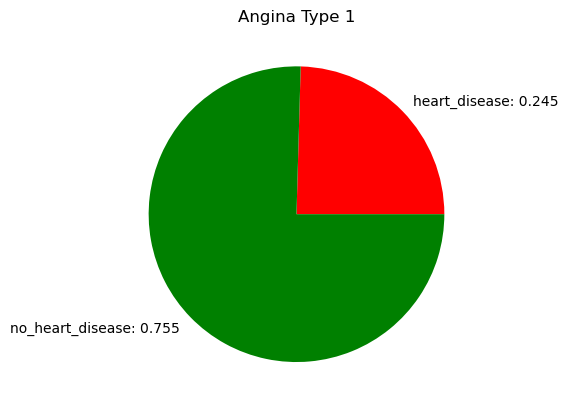

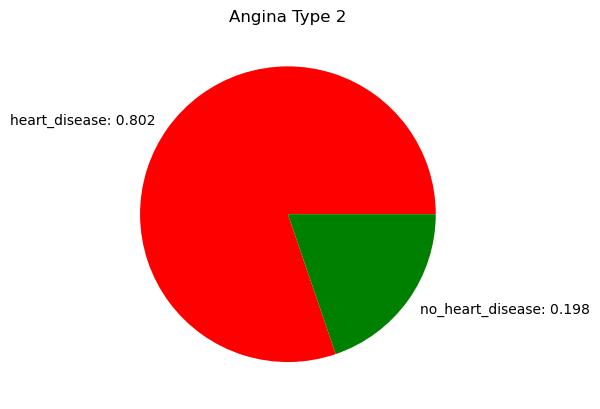

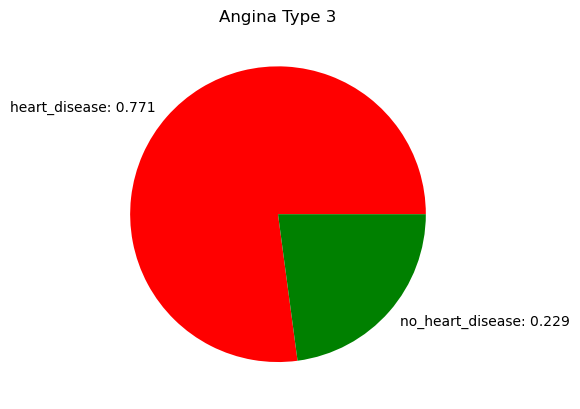

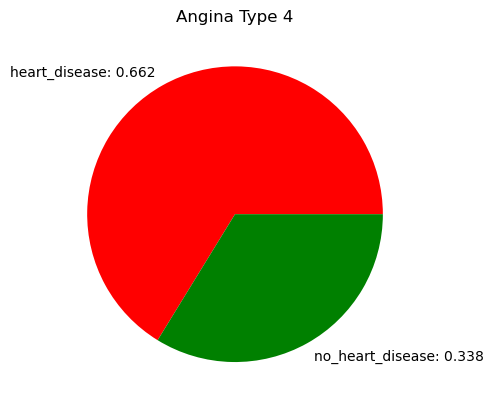

In [117]:
hd_by_at = heart.groupby(by = 'angina_type')['heart_disease'].mean()

hd_by_at = list(hd_by_at)

#Type 1
plt.pie(x = (hd_by_at[0], 1-hd_by_at[0]), labels = [f'heart_disease: {round(hd_by_at[0], 3)}', f'no_heart_disease: {round(1-hd_by_at[0], 3)}'], colors = ['red', 'green'], )
plt.title('Angina Type 1')
plt.show()

#Type 2
plt.pie(x = (hd_by_at[1], 1-hd_by_at[1]), labels = [f'heart_disease: {round(hd_by_at[1], 3)}', f'no_heart_disease: {round(1-hd_by_at[1], 3)}'], colors = ['red', 'green'])
plt.title('Angina Type 2')
plt.show()

#Type 3
plt.pie(x = (hd_by_at[2], 1-hd_by_at[2]), labels =  [f'heart_disease: {round(hd_by_at[2], 3)}', f'no_heart_disease: {round(1-hd_by_at[2], 3)}'], colors = ['red', 'green'])
plt.title('Angina Type 3')
plt.show()

#Type 4
plt.pie(x = (hd_by_at[3], 1-hd_by_at[3]), labels = [f'heart_disease: {round(hd_by_at[3], 3)}', f'no_heart_disease: {round(1-hd_by_at[3], 3)}'], colors = ['red', 'green'])
plt.title('Angina Type 4')
plt.show()

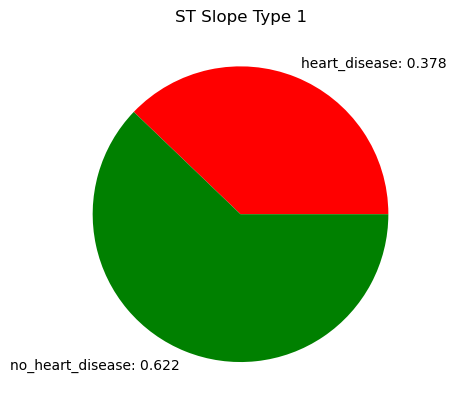

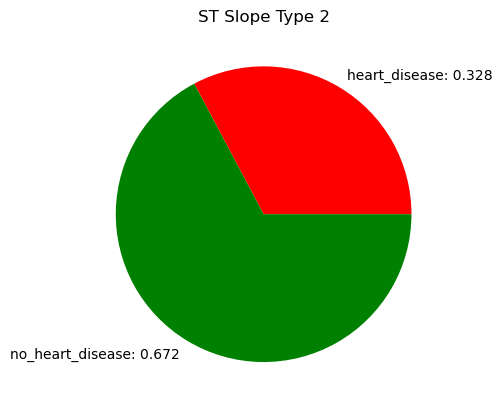

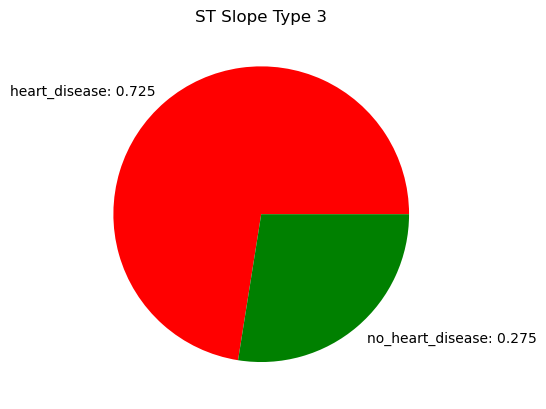

In [118]:

hd_by_st_slope = heart.groupby(by = 'st_slope')['heart_disease'].mean()

hd_by_st_slope = list(hd_by_st_slope)

plt.pie(x = (hd_by_st_slope[0], 1-hd_by_st_slope[0]), labels = [f'heart_disease: {round(hd_by_st_slope[0], 3)}', f'no_heart_disease: {round(1-hd_by_st_slope[0], 3)}'], colors = ['red', 'green'])
plt.title('ST Slope Type 1')
plt.show()

plt.pie(x = (hd_by_st_slope[1], 1-hd_by_st_slope[1]), labels = [f'heart_disease: {round(hd_by_st_slope[1], 3)}', f'no_heart_disease: {round(1-hd_by_st_slope[1], 3)}'], colors = ['red', 'green'])
plt.title('ST Slope Type 2')
plt.show()


plt.pie(x = (hd_by_st_slope[2], 1-hd_by_st_slope[2]), labels = [f'heart_disease: {round(hd_by_st_slope[2], 3)}', f'no_heart_disease: {round(1-hd_by_st_slope[2], 3)}'], colors = ['red', 'green'])
plt.title('ST Slope Type 3')
plt.show()


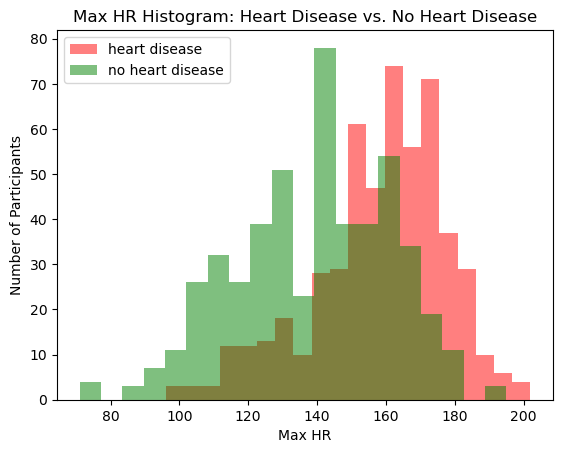

In [119]:
hd = heart[heart['heart_disease'] == 1]
nhd = heart[heart['heart_disease'] == 0]

plt.hist(hd['max_hr'], color = 'r', bins = 20, alpha = 0.5, label = 'heart disease')
plt.hist(nhd['max_hr'], color = 'g', bins = 20, alpha = 0.5, label = 'no heart disease')
plt.ylabel('Number of Participants')
plt.xlabel('Max HR')
plt.legend()
plt.title('Max HR Histogram: Heart Disease vs. No Heart Disease')
plt.show()


Predictive Modeling:

Given that so much of this data is categorical, it seems like tree-based models would perform well here. Let's check!

In [120]:
X = heart.drop('heart_disease', axis = 1).copy()
y = heart[['heart_disease']].copy()

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle = True, random_state= 26)


dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)
tree_preds = dtc.predict(x_test)


#Metrics
print(f'accuracy score: {accuracy_score(y_test, tree_preds)}')
print(f'precision score: {precision_score(y_test, tree_preds)}')
print(f'log loss: {log_loss(y_test, tree_preds)}')

accuracy score: 0.9883268482490273
precision score: 1.0
log loss: 0.4207430356706285


The tree performs well, honestly better than I was expecting. 
Consistently, we have:
Precision > 0.95 
Accuracy > 0.95
Log Loss < 1

In [121]:
logo = LogisticRegressionCV(cv = 5, max_iter= 100000)

logo.fit(x_train, y_train)

logo_preds = logo.predict(x_test)


#Metrics
print(f'accuracy score: {accuracy_score(y_test, logo_preds)}')
print(f'precision score: {precision_score(y_test, logo_preds)}')
print(f'log loss: {log_loss(y_test, logo_preds)}')




/opt/miniconda3/envs/cs111-env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy score: 0.8443579766536965
precision score: 0.8137931034482758
log loss: 5.609907142275043


The logistic regression is solid, but the tree cannot be topped.
Without tuning hyperparameters, the accuracy is about 83-85 and the precision is 79-81. After playing around with number of CV folds, elastic net and l1 penalties (as opposed to the default l2 penalty), these values did not improve.




Clustering

Better to use kmodes in this case because the vars most strongly correlated with heart disease are categorical.

angina_type         1         2        3         4
st_slope                                          
1            0.059659  0.011364  0.00000  0.012784
2            0.414773  0.058239  0.15625  0.055398
3            0.231534  0.000000  0.00000  0.000000
angina_type         2         3         4
st_slope                                 
1            0.000000  0.046729  0.000000
3            0.367601  0.495327  0.090343


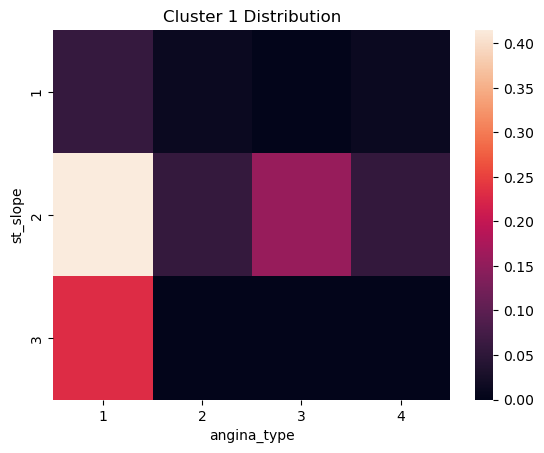

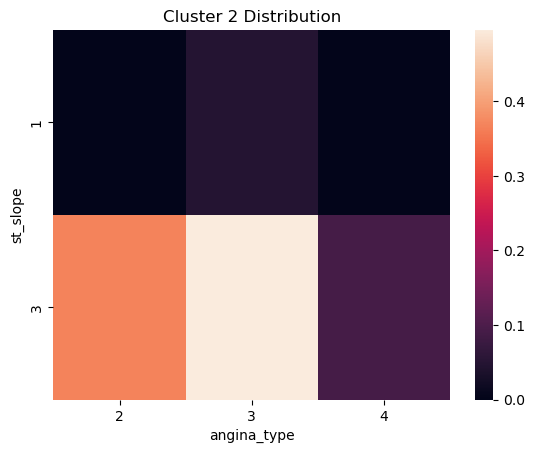

In [122]:
km = KModes(n_clusters= 2)

clusters = km.fit_predict(X[['st_slope', 'angina_type']])

m1 = X[['st_slope', 'angina_type']].reset_index()
m2 = pd.DataFrame(clusters).reset_index()

clusters = pd.merge(left = m1, right = m2, how = 'inner', on = 'index')
clusters = clusters.rename({0: 'cluster'}, axis = 1)
cluster1 =clusters[clusters['cluster'] == 0]
cluster2 =clusters[clusters['cluster'] == 1]



c1dist = pd.crosstab(index = cluster1['st_slope'], columns= cluster1['angina_type'], normalize= True)
c2dist = pd.crosstab(index = cluster2['st_slope'], columns= cluster2['angina_type'], normalize = True)


print(c1dist)
print(c2dist)



sns.heatmap(c1dist)
plt.title('Cluster 1 Distribution')
plt.show()


sns.heatmap(c2dist)
plt.title('Cluster 2 Distribution')
plt.show()


If we look at the groups we can see that:

Cluster 1 predominantly contains:
Angina T1, 
st slope T2 (majority) or T3 (minority)


Cluster 2 predominantly contains:
Angina T2 or T3
st slope T3


Based on the previous graphs, Cluster 1 seems to favor healthier individuals, while Cluster 2 seems to have a disproportionate ppl w heart disease
